# Проект по SQL

<div style="border:solid green 2px; padding: 20 px">

Цель исследования - проанализировать базу данных крупного сервиса для чтения книг по подписке и дать ответы на вопросы:

-  сколько книг вышло после 1 января 2000 года;

- для каждой книги посчитайте количество обзоров и среднюю оценку;

- определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так исключим из анализа брошюры;

- определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

- посчитайть среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

Ответы на вопросы помогут сформировать ценностное предложение для нового продукта.

</div>

<div style="border:solid black 1px; padding: 20 px">

# **Описание данных**

В базе данных содержится информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.

**Таблица `books` - содержит данные о книгах:**

`book_id` — идентификатор книги;

`author_id` — идентификатор автора;

`title` — название книги;

`num_pages` — количество страниц;

`publication_date` — дата публикации книги;

`publisher_id` — идентификатор издателя.

**Таблица `authors` - Содержит данные об авторах:**

`author_id` — идентификатор автора;

`author` — имя автора.

**Таблица `publishers`- cодержит данные об издательствах:**

`publisher_id` — идентификатор издательства;
    
`publisher` — название издательства;

**Таблица `ratings` - Содержит данные о пользовательских оценках книг:**

`rating_id` — идентификатор оценки;

`book_id` — идентификатор книги;

`username` — имя пользователя, оставившего оценку;

`rating` — оценка книги.

**Таблица `reviews`- Содержит данные о пользовательских обзорах:**

`review_id` — идентификатор обзора;

`book_id` — идентификатор книги;

`username` — имя автора обзора;

`text` — текст обзора.
    
 </div>

**Схема данных**

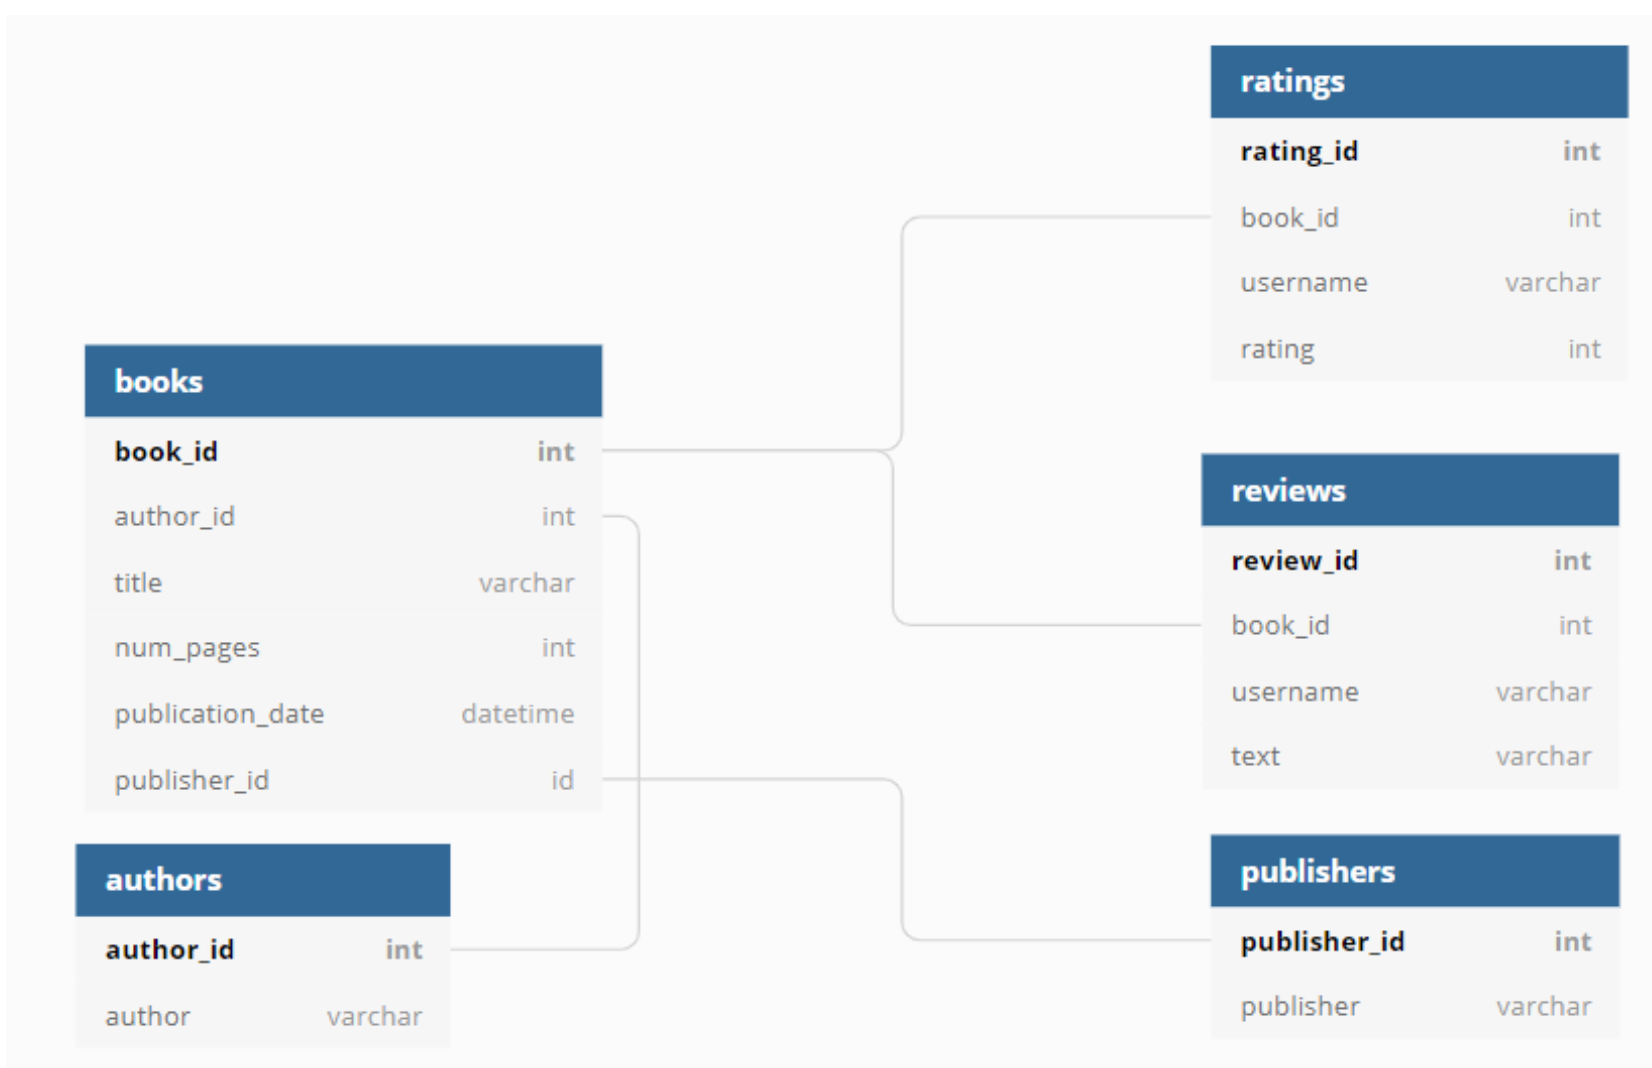

## Подключение к базе данных

In [1]:
#установка библиотеки
#!pip install sqlalchemy

In [2]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 

In [3]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db'} # название базы данных

#формируем строку подключения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']) 

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Обзор таблиц

In [4]:
#фукнция для выполнения запроса
def make_query(query):
    df = pd.read_sql_query(query, con = engine) 
    return df

- books

In [5]:
#выведем первые строки таблицы books
books = '''
SELECT *
FROM books
LIMIT 10

        '''

In [6]:
#выводим при помощи функции
make_query(books)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


In [7]:
#выясним сколько авторов, издателей и книг, а также диапазон страниц представлено в таблице
books_count = '''
SELECT COUNT(DISTINCT book_id) AS count_books,
       COUNT(DISTINCT author_id) AS count_authors,
       COUNT(DISTINCT publisher_id) AS count_publisher,
       MAX (num_pages) AS max_pages,
       MIN(num_pages) AS min_pages,
       MIN (publication_date) AS min_date,
       MAX (publication_date) AS max_date
FROM books

        '''

In [8]:
#выводим при помощи функции
make_query(books_count)

,count_books,count_authors,count_publisher,max_pages,min_pages,min_date,max_date
0,1000,636,340,2690,14,1952-12-01,2020-03-31


<div style="border:solid black 1px; padding: 20 px">
    
В таблице `books` представлена информация о 1000 книг, уникальных авторов - 636, уникальных издательств - 340. Книги имеют диапазон страниц от 14 до 2690. Книги публиковались с 1 декабря 1952 по 31 марта 2020.
    
</div>

 - authors

In [9]:
#выведем первые строки таблицы authors
authors = '''
SELECT *
FROM authors
LIMIT 10

        '''

In [10]:
#выполняем запрос
make_query(authors)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


In [11]:
#посчитаем количество авторов 
count_authors = '''
SELECT COUNT(author_id) AS count_authors
FROM authors

        '''

In [12]:
#выполняем запрос
make_query(count_authors)

,count_authors
0,636


<div style="border:solid black 1px; padding: 20 px">
    
В таблице `authors` представлена информация о 636 авторах, такое же количество уникальных авторов содержится в таблице `books`.

</div>

- publishers

In [13]:
#выведем первые строки таблицы publishers
publishers = '''
SELECT *
FROM publishers
LIMIT 10

        '''

In [14]:
make_query(publishers)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


In [15]:
#посчитаем количество издательств
count_publishers = '''
SELECT COUNT(publisher_id) AS count_publishers
FROM publishers

        '''

In [16]:
make_query(count_publishers)

,count_publishers
0,340


<div style="border:solid black 1px; padding: 20 px">
    
В таблице `publishers` представлена информация о 340 издательствах, такое же количество уникальных издательств содержится в таблице `books`.
</div>

- ratings

In [17]:
#выведем первые строки таблицы publishers
ratings = '''
SELECT *
FROM ratings
LIMIT 10

        '''

In [18]:
make_query(ratings)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


In [19]:
#посчитаем количество оценок, для какого количества книг представлены рейтинги, и сколько уникальных пользователей их ставили
count_ratings = '''
SELECT COUNT(DISTINCT book_id) AS count_books,
       COUNT(DISTINCT username) AS count_user,
       COUNT(rating_id) as count_rating
FROM ratings

        '''

In [20]:
make_query(count_ratings)

,count_books,count_user,count_rating
0,1000,160,6456


<div style="border:solid black 1px; padding: 20 px">
    
В таблице `ratings` представлена информация о 6456 оценках, поставленными 160 пользователями для 1000 книг.
</div>

- reviews

In [21]:
#выведем первые строки таблицы reviews
reviews = '''
SELECT *
FROM reviews
LIMIT 10

        '''

In [22]:
make_query(reviews)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


In [23]:
#посчитаем количество отзывов, для какого количества книг представлены отзывы, и сколько уникальных пользователей их оставили
count_reviews = '''
SELECT COUNT(DISTINCT book_id) AS count_books,
       COUNT(DISTINCT username) AS count_user,
       COUNT(review_id) as count_review
FROM reviews

        '''

In [24]:
make_query(count_reviews)

,count_books,count_user,count_review
0,994,160,2793


<div style="border:solid black 1px; padding: 20 px">
    
В таблице `review` представлена информация о 2793 отзывах, поставленными 160 пользователями для 994 книг.
    
</div>

## Задания

### Количество книг после 1 января 2000 года

In [25]:
query_1 = '''
SELECT
     COUNT (*) AS books_2000
FROM books
WHERE publication_date >= '2000-01-01'

        '''

In [26]:
make_query(query_1)

,books_2000
0,821


<div style="border:solid black 1px; padding: 20 px">
    
После 2000 года вышла 821 книга, что составляет 82,1% от всего количества книг.
    
</div>

### Количество обзоров и средняя оценка книг

In [27]:
#сортировка по количеству публикаций
query_2 = '''
SELECT  b.book_id,
        b.title,
        COUNT (DISTINCT r.review_id) AS count_review,
        AVG(rt.rating) AS avg_rating
FROM  books b
LEFT JOIN ratings rt ON b.book_id=rt.book_id
LEFT JOIN reviews r ON b.book_id=r.book_id
GROUP BY b.book_id, b.title
ORDER BY count_review DESC

        '''

In [28]:
make_query(query_2)

,book_id,title,count_review,avg_rating
0,948,Twilight (Twilight #1),7,3.662500
1,963,Water for Elephants,6,3.977273
2,734,The Glass Castle,6,4.206897
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,808,The Natural Way to Draw,0,3.000000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,221,Essential Tales and Poems,0,4.000000


In [29]:
#сортировка по среднему рейтингу
query_3 = '''
SELECT  b.book_id,
        b.title,
        COUNT (DISTINCT r.review_id) AS count_review,
        AVG(rt.rating) AS avg_rating
FROM  books b
LEFT JOIN ratings rt ON b.book_id=rt.book_id
LEFT JOIN reviews r ON b.book_id=r.book_id
GROUP BY b.book_id, b.title
ORDER BY avg_rating DESC

        '''

In [30]:
make_query(query_3)

,book_id,title,count_review,avg_rating
0,86,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
1,901,The Walking Dead Book One (The Walking Dead #...,2,5.00
2,390,Light in August,2,5.00
3,972,Wherever You Go There You Are: Mindfulness Me...,2,5.00
4,136,Captivating: Unveiling the Mystery of a Woman'...,2,5.00
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,3,2.25
996,316,His Excellency: George Washington,2,2.00
997,202,Drowning Ruth,3,2.00
998,371,Junky,2,2.00


In [31]:
#все книги с рейтингом 5.0
query_4 = '''
SELECT  b.book_id,
        b.title,
        COUNT (DISTINCT r.review_id) AS count_review,
        AVG(rt.rating) AS avg_rating
FROM  books b
LEFT JOIN ratings rt ON b.book_id=rt.book_id
LEFT JOIN reviews r ON b.book_id=r.book_id
GROUP BY b.book_id, b.title
HAVING AVG(rt.rating)=5.0
ORDER BY avg_rating DESC

        '''

In [32]:
make_query(query_4)

,book_id,title,count_review,avg_rating
0,17,A Dirty Job (Grim Reaper #1),4,5.0
1,20,A Fistful of Charms (The Hollows #4),2,5.0
2,55,A Woman of Substance (Emma Harte Saga #1),2,5.0
3,57,Act of Treason (Mitch Rapp #9),2,5.0
4,62,Alas Babylon,2,5.0
5,76,Angels Fall,2,5.0
6,86,Arrows of the Queen (Heralds of Valdemar #1),2,5.0
7,136,Captivating: Unveiling the Mystery of a Woman'...,2,5.0
8,169,Crucial Conversations: Tools for Talking When ...,2,5.0
9,182,Dead Souls,2,5.0


<div style="border:solid green 2px; padding: 20 px">
    
Максимальное количество обзоров на книгу 7 - "Twilight", причем книга имеет средний рейтинг 3.66.
Хочется отметить, что все пять книг с наибольшим количеством отзывов имеют экранизации (фильм, серия фильмов, сериал):
- "Water for Elephants" - 6 отзывов - 3.98;
- "The Glass Castle" - 6 отзывов - 4.21;
- "Harry Potter and the Prisoner of Azkaban" - 6 отзывов - 4.41;
- "The Curious Incident of the Dog in the Night-Time" - 6 отзывов - 4.08.

Максимальный рейтинг 5.0 имеет 43 книги, причем в среднем на книги оставляют 1-2 отзыва. Изучив список, я могу отметить то, что эти книги не знакомы на слух.
    
Таким образом, можно сделать вывод, что наибольшее количество отзывов имеют книги с экранизациями ("Сумерки", "Гарри Поттер", "Воды слонам" и тд), причем большее количество отзывов не гарантирует высший рейтинг. Наличие экранизации подтверждает популярность книги, так как обычно сначала книга становится популярной, и потом ее решают экранизировать. Жанр книги играет не последнюю роль в получении известности, например, детская и подростковая литература, роман и детектив традиционно имеют больший спрос.
    
Книги с наибольшим рейтингом имеют в среднем 1-2 отзыва. Эти книги не нашли широкого охвата, и , вероятно, отзывы оставляют преданные читатели.
    
</div>

### Издательство, которое выпустило наибольшее число книг толще 50 страниц

In [33]:
#издательство, выпустившее наибольшее количество книг
query_5 = '''
SELECT  p.publisher,
        COUNT(*) AS count_book
FROM  books b
LEFT JOIN publishers p ON b.publisher_id=p.publisher_id
WHERE b.num_pages>=50
GROUP BY p.publisher_id, p.publisher
ORDER BY count_book DESC
LIMIT 1

        '''

In [34]:
make_query(query_5)

,publisher,count_book
0,Penguin Books,42


In [35]:
#топ-5 издательств по количеству книг
query_6 = '''
SELECT  p.publisher,
        COUNT(*) AS count_book
FROM  books b
LEFT JOIN publishers p ON b.publisher_id=p.publisher_id
WHERE b.num_pages>=50
GROUP BY p.publisher_id, p.publisher
ORDER BY count_book DESC
LIMIT 5

        '''

In [36]:
make_query(query_6)

,publisher,count_book
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


<div style="border:solid green 2px; padding: 20 px">
    
Издательство "Penguin Books" выпустило максимальное количество книг - 42. 

В топ-5 попали следующие издательсва:

- Vintage - 31 книга
    
- Grand Central Publishing - 25 книг
    
- Penguin Classics - 24 книги
    
- Bantam - 19 книг.
    
"Penguin Books" имеет большой отрыв в количестве выпущенных книг, если учесть еще и то, что "Penguin Classics" (из топ-5) - это книжная серия издательства "Penguin Books".

    
</div>

### Автор с самой высокой средней оценкой книг — учитываем только книги с 50 оценками и более

In [37]:
#автор с самой высокой средней оценкой книг
query_7 = '''
SELECT  a.author,
        AVG(rt.rating) AS avg_rating
FROM  books b
LEFT JOIN authors a ON b.author_id=a.author_id
LEFT JOIN ratings rt ON b.book_id=rt.book_id
WHERE b.book_id in (
    SELECT book_id
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating_id)>=50
                   )
GROUP BY a.author
ORDER BY avg_rating DESC
LIMIT 1

        '''

In [38]:
make_query(query_7)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


In [39]:
#топ-5 авторов с самой высокой средней оценкой книг
query_8 = '''
SELECT  a.author,
        AVG(rt.rating) AS avg_rating
FROM  books b
LEFT JOIN authors a ON b.author_id=a.author_id
LEFT JOIN ratings rt ON b.book_id=rt.book_id
WHERE b.book_id in (
    SELECT book_id
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating_id)>=50
                   )
GROUP BY a.author
ORDER BY avg_rating DESC
LIMIT 5

        '''

In [40]:
make_query(query_8)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.246914
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


<div style="border:solid green 2px; padding: 20 px">
   
Автор с самой высокой оценкой 4.29 (учитывали только книги с 50 оценками и более) - J.K. Rowling и Mary GrandPré. Mary GrandPré иллюстрировала серию книг Джоан Роулинг про Гарри Поттера. 
    
На втором месте  Markus Zusak/Cao Xuân Việt Khương с рейтингом 4.26. Cao Xuân Việt Khương - это переводчик книги "Книжный вор" автора Markus Zusak.
    

На третьем месте J.R.R. Tolkien с рейтингом 4.25, наиболее известен как автор "Хоббита", трилогии "Властелин колец".

На четвертом месте Louisa May Alcott с рейтингом 4.19. Это американская писательница, получившая известность благодаря роману «Маленькие женщины».
    
Пятое место Американский писатель Rick Riordan с рейтингом 4.08, наиболее известен как автор серии романов про Перси Джексона.
    
Видно, что в топ-5 попали писатели, которые имеют экранизации по своим книгам. Причем 3 из 5 являются авторами успешной серии книг.
</div>

### Среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [41]:
#среднее количество обзоров пользователей, оставивших больше 48 оценок
query_9 = '''

WITH avg_user AS
  (SELECT  rt.username,
           COUNT(rt.review_id) AS review_user
FROM  reviews rt
WHERE rt.username in (
    SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id)>48
                   )
GROUP BY rt.username)

SELECT AVG(au.review_user) AS avg_review
FROM  avg_user au

        '''

In [42]:
make_query(query_9)

,avg_review
0,24.0


In [43]:
#таблица с количеством обзоров пользователей, которые оставили больше 48 оценок
query_10 = '''
SELECT  rt.username,
           COUNT(rt.review_id) AS review_user
FROM  reviews rt
WHERE rt.username in (
    SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id)>48
                      )
GROUP BY rt.username
ORDER BY review_user DESC
           '''

In [44]:
make_query(query_10)

,username,review_user
0,susan85,29
1,sfitzgerald,28
2,martinadam,27
3,lesliegibbs,26
4,richard89,26
5,jennifermiller,25
6,shermannatalie,24
7,walter49,23
8,paul88,22
9,vanessagardner,22


<div style="border:solid green 2px; padding: 20 px">
   
Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок - 24.
    
Наибольшее количество обзоров составил пользователь susan85 - 29, наименьшее colin90 - 18 отзывов.
</div>

<div style="border:solid green 2px; padding: 20 px">
    
**Вывод**
   
В базе содержится информация о 1 000 уникальных книг, написанных 636 авторами. Число страниц в книгах от 14 до 2 690, даты издания - с 1 декабря 1952 года по 31 марта 2020 года. Книги изданы 340 издательствами. Оценки были поставлены для 1000 книг 160 пользователями. При этом пользователи написали обзор на 994 книги, суммарно сделав 2 793 обзора. Шкала оценки книги от 1 до 5.
Анализ данных позволил сделать следующие выводы.
    
При выполнении запросов мы выяснили, что :

- с 1 января 2000 года вышла 821 книга из представленных 1 000, что составляет 82,1% - большая часть книг.
- Максимальное количество обзоров на книгу 7 - "Twilight", причем книга имеет средний рейтинг 3.66. Хочется отметить, что все пять книг с наибольшим количеством отзывов имеют экранизации (фильм, серия фильмов, сериал).
Максимальный рейтинг 5.0 имеет 43 книги, причем в среднем на книги оставляют 1-2 отзыва. Изучив список, я могу отметить то, что эти книги не знакомы на слух.

Таким образом, можно сделать вывод, что наибольшее количество отзывов имеют книги с экранизациями ("Сумерки", "Гарри Поттер", "Воды слонам" и др), причем большее количество отзывов не гарантирует высший рейтинг. Наличие экранизации подтверждает популярность книги. Жанр книги играет не последнюю роль в получении известности, например, детская и подростковая литература, роман и детектив традиционно имеют больший спрос. Книги с наибольшим рейтингом имеют в среднем 1-2 отзыва. Эти книги не нашли широкого охвата, и отзывы оставляют преданные читатели. Аналогично ситуация и для книг с низкими ретингами, они имеют мало отзывов, и, вероятно, их оставляют те, кому книга совсем не понравилась.
    
- Издательство "Penguin Books" выпустило максимальное количество книг - 42.

В топ-5 по количеству книг попали следующие издательсва: Vintage, Grand Central Publishing, Penguin Classics, Bantam. Если учесть то, что "Penguin Classics" (из топ-5) - это книжная серия издательства "Penguin Books", то "Penguin Books" будет явным рекордсменом по количеству выпущенных книг.
    
- Автор с самой высокой оценкой 4.29  - J.K. Rowling (написала серию книг про Гарри Поттера).
На втором месте Markus Zusak, написал бестселлеры «Книжный вор» (снят фильм) и «Глиняный мост».
На третьем месте J.R.R. Tolkien, наиболее известен как автор "Хоббита", трилогии "Властелин колец".
На четвертом месте Louisa May Alcott - писательница, получившая известность благодаря роману «Маленькие женщины».
Пятое место писатель Rick Riordan, наиболее известен как автор серии романов про Перси Джексона.

В топ-5 попали писатели, которые имеют экранизации по своим книгам. Причем 3 из 5 являются авторами успешной серии книг.
    
- Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок - 24.
Наибольшее количество отзывов оставляют следующие пользоатели:
    
    - susan85	    29
    
	- sfitzgerald	28
    
	- martinadam	27
    
	- lesliegibbs	26
    
	- richard89	    26
    
	- jennifermiller 25.
</div>